# chapter 3. 신경망

__3.1 퍼셉트론에서 신경망으로__

* 3.1.1 신경망의 예

* 3.1.2 퍼셉트론 복습

* 3.1.3 활성화 함수의 등장

![신경망](http://mblogthumb3.phinf.naver.net/20160528_174/cjh9217_14643637169460a5T9_PNG/MultiLayerNeuralNetworkBigger_english.png?type=w2)

__3.2 활성화 함수__

* 3.2.1 시그모이드 함수

* 3.2.2 계단 함수 구현하기

* 3.2.3 계단 함수의 그래프

* 3.2.4 시그모이드 함수 구현하기

* 3.2.5 시그모이드 함수와 계단 함수 비교

* 3.2.6 비선형 함수

* 3.2.7 ReLU 함수



# step_function.py

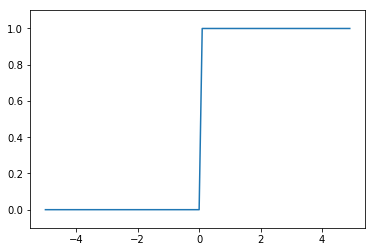

In [33]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()


__퍼셉트론__에서는 __활성화 함수__로 __계단함수__를 이용한다. 

# sigmoid.py

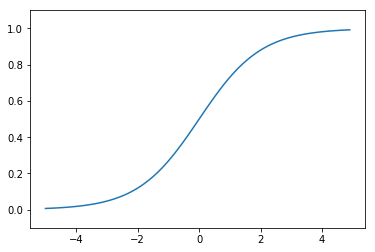

In [34]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


__신경망__에서는 __활성화 함수__로 __시그모이드 함수__를 이용한다. 

![시그모이드함수](https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcQaz0HihKYnwLnixJHPvMHK7x1xQ-IsgBfBXLIf-1DF-CWW46n-)

# sig_step_compare.py

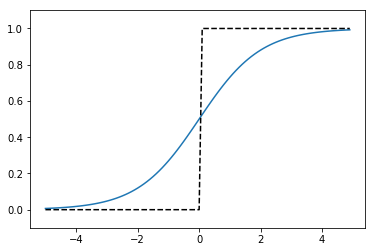

In [35]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()


* 선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.

> 예를 들어, h(x)=cx

> y(x)=h(h(h(x)))

> y(x)= c^3*x

* 그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

# relu.py

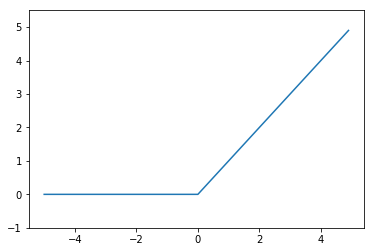

In [36]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

![Relu함수](https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcR3SpYEl3VI0JqJ46aqc2svFamLd3pyi_chNsWhlItb5dVXBkiZ0g)

최근에는 ReLU(Recitified Linear Unit)함수를 주로 이용한다.

이번 장에서는 시그모이드 함수를 활성화 함수로 사용하지만, 이 책 후반부에서는 주로 ReLU함수를 사용할 것이다.

__3.3 다차원 배열의 계산__

* 3.3.1 다차원 배열

* 3.3.2 행렬의 내적(행렬 곱)

* 3.3.3 신경망의 내적

![다차원](http://postfiles14.naver.net/MjAxNzA0MDVfMTkx/MDAxNDkxMzg3NTgxOTI5.ig0Z9OOXmv9Y0iRqF2r79swrtvlckCoIUIffLSzUOkYg.Bdvi7Mnawm2F979jMtak26QV04Dlr3wI6_MT9d_4d4gg.PNG.o_oaill/%EC%BA%A1%EC%B2%981.PNG?type=w1)

![다차원](http://postfiles4.naver.net/MjAxNzA0MDVfOSAg/MDAxNDkxMzg3NTgxNzY4.8X_izVfu0cbYbDrA2icY9mOL3g9_7FPKdpL4XW66pbIg.3hWNYHb6zKm_pX_nO1PN43Yo-O3w7MEeqSRjMBYk0uQg.PNG.o_oaill/%EC%BA%A1%EC%B2%98.PNG?type=w1)

![다차원](http://postfiles13.naver.net/MjAxNzA0MDVfMTMz/MDAxNDkxMzg3ODExODU4.00UgpNI35lQD5rHin8wc0UOrNySysrFoS1awwMJfSREg.RbS5BH7Q-nhWhiH5s3D8dKF_CoTDAjIRlDO373hdBxYg.PNG.o_oaill/%EC%BA%A1%EC%B2%982222.PNG?type=w1)

__3.4 3층 신경망 구현하기__

* 3.4.1 표기법 설명

* 3.4.2 각 층의 신호 전달 구현하기

* 3.4.3 구현 정리

In [37]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)
A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


![다차원](http://postfiles3.naver.net/MjAxNzA0MDVfMTk5/MDAxNDkxMzg3NTgyMDQ4.WtbgbH7-EVMNdUJ1yo3JYad88M3y6ukPi72EVxdhM9cg.f_jCMZRJ4ATfrufxEs2vJjuHp8gJCDvTNvHl8SAQe1kg.PNG.o_oaill/%EC%BA%A1%EC%B2%982.PNG?type=w1)

In [38]:
Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


![다차원](http://postfiles14.naver.net/MjAxNzA0MDVfODEg/MDAxNDkxMzg3NTgyMjU0.zL5xbAlAuBGFGIm-2qYi6raqiIbsYAdjNKxl0K74cysg.71J99fGlex0LydlOlTeglO_KwxdaKM6e5fSMqznHn1Ug.PNG.o_oaill/%EC%BA%A1%EC%B2%983.PNG?type=w1)

In [39]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


![다차원](http://postfiles15.naver.net/MjAxNzA0MDVfMjE4/MDAxNDkxMzg3NTgyMzk3.3qKbIeLk9bPAy3FeoGTmAO0SAdPml47oSPzGg8nVOa0g.Af8rus3bzGB4NM0eBhLpvZhCyn4Rxhn72NRQ43-Rp9kg.PNG.o_oaill/%EC%BA%A1%EC%B2%985.PNG?type=w1)

In [40]:
def identity_function(x):
 return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3
print(Y)

[ 0.31682708  0.69627909]


__3.5 출력층 설계하기__

* 3.5.1 항등 함수와 소프트맥스 함수 구현하기

* 3.5.2 소프트맥스 함수 구현 시 주의점

* 3.5.3 소프트맥스 함수의 특징

* 3.5.4 출력층의 뉴런 수 정하기

__<출력층에서 사용하는 활성화 함수>__
* 회귀 : 항등함수(identity function)

![항등함수](http://postfiles5.naver.net/MjAxNzA0MDVfMTI4/MDAxNDkxMzg4NDgyMjkw.1mgM1bFuH0c2_cxp3PuTGnwggjHGmXEAmw9nPlS-beQg.Uu0_KdwJ8Zs1j36XFmsy3Uo6Ut8leVPHtaICPV1s9CEg.PNG.o_oaill/%EC%BA%A1%EC%B2%9833333.PNG?type=w1)

* 분류 : 소프트맥스 함수(softmax function)

![소프트맥스함수](http://postfiles4.naver.net/MjAxNzA0MDVfNDkg/MDAxNDkxMzg4NDgxNzc0.-9WAOLp793mS1owQQ0FnL7xvzvS9C6WzFcUY3vK5tUcg.7071bHe3lt2K-pTfKxIop3wvUYgKvr8FzuAA3b83bREg.PNG.o_oaill/%EC%BA%A1%EC%B2%9832.PNG?type=w1)

![소프트함수](http://postfiles1.naver.net/MjAxNzA0MDVfMTkw/MDAxNDkxMzg4NDgxOTE4.f1ONTrhty42IlMYIyvCT4PCLYw2k5iGmZJBt1KOM8i8g.BNoojM7N8uyrtsOzuouDypMJw9oGwM4Hn3zJE63FGrwg.PNG.o_oaill/%EC%BA%A1%EC%B2%9842.PNG?type=w1)

컴퓨터는 수number를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다룹니다. 다시 말
해 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없다는 문제가 발생합니다. 이것을 __오버플로 overflow__라 하며, 컴퓨터로 수치를 계산할 때 주의할 점입니다.

![소프트](http://postfiles2.naver.net/MjAxNzA0MDVfMTk0/MDAxNDkxMzg4NDgyMDI0.zf7RgFs_LKU_msJJdv9mtjtyEh0I4MIqKGKIu9Czcp4g.5r9Liux142XWaF40SiEo_bmRdnqwF6pbX_qPuWhqIywg.PNG.o_oaill/%EC%BA%A1%EC%B2%98343.PNG?type=w1)

 C'에 어떤 값을 대입해도 상관없지만, 오버플로우를 막을 목적으로는 입력 신호 중 최대값을 이용하는 것이 일반적이다.

* __신경망 예제__

![신경망예제](https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSWcZGKs0FQG3JXzRoCx-zvTiAeWZI36Ja8RHjR6XYnzSZ1s9lX)

__3.6 손글씨 숫자 인식__

* 3.6.1 MNIST 데이터셋

* 3.6.2 신경망의 추론 처리

* 3.6.3 배치 처리

# mnist_show.py

In [41]:
#%matplotlib inline

import sys, os
path="C:\\Users\\user\\Desktop\\deep-learning-from-scratch-master-20170405T083119Z-001\\deep-learning-from-scratch-master\\ch03"
os.chdir(path)
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print("x_train[0]에 들어있는 숫자는 ",label,"\n")  # 5

print("X의 차원은 ",img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print("why> 이미지 (가로, 세로):",img.shape)  # (28, 28)
#img_show(img)

x_train[0]에 들어있는 숫자는  5 

X의 차원은  (784,)
why> 이미지 (가로, 세로): (28, 28)


![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxr4492CHcJef0x-7Zw4rYYvB2oYYdZvgtIJEGoYMroRS3U10Wiw)

# neuralnet_mnist.py

In [42]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

print("test data인 x의 dimension은 ",x.shape,"\n즉, 총",x.shape[0],"개의 test data이다.")
print("\n<x>\n",x)

print("\nnetwork의 type은 ",type(network))

print("\n<network>\n",network,"\n")

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

test data인 x의 dimension은  (10000, 784) 
즉, 총 10000 개의 test data이다.

<x>
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

network의 type은  <class 'dict'>

<network>
 {'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.01814

# neuralnet_mnist_batch.py

In [43]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    f=i/100
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    print(int(f),"]",i,"부터 ",i+batch_size,"까지 배치완료")
    print(int(f),"번째 배치의 Accuracy는 ",str(np.sum(p == t[i:i+batch_size]) / len(x[i:(i+batch_size)])))

print("\nAccuracy:" + str(float(accuracy_cnt) / len(x)))

0 ] 0 부터  100 까지 배치완료
0 번째 배치의 Accuracy는  0.96
1 ] 100 부터  200 까지 배치완료
1 번째 배치의 Accuracy는  0.98
2 ] 200 부터  300 까지 배치완료
2 번째 배치의 Accuracy는  0.93
3 ] 300 부터  400 까지 배치완료
3 번째 배치의 Accuracy는  0.9
4 ] 400 부터  500 까지 배치완료
4 번째 배치의 Accuracy는  0.94
5 ] 500 부터  600 까지 배치완료
5 번째 배치의 Accuracy는  0.89
6 ] 600 부터  700 까지 배치완료
6 번째 배치의 Accuracy는  0.93
7 ] 700 부터  800 까지 배치완료
7 번째 배치의 Accuracy는  0.95
8 ] 800 부터  900 까지 배치완료
8 번째 배치의 Accuracy는  0.93
9 ] 900 부터  1000 까지 배치완료
9 번째 배치의 Accuracy는  0.91
10 ] 1000 부터  1100 까지 배치완료
10 번째 배치의 Accuracy는  0.92
11 ] 1100 부터  1200 까지 배치완료
11 번째 배치의 Accuracy는  0.9
12 ] 1200 부터  1300 까지 배치완료
12 번째 배치의 Accuracy는  0.87
13 ] 1300 부터  1400 까지 배치완료
13 번째 배치의 Accuracy는  0.92
14 ] 1400 부터  1500 까지 배치완료
14 번째 배치의 Accuracy는  0.9
15 ] 1500 부터  1600 까지 배치완료
15 번째 배치의 Accuracy는  0.9
16 ] 1600 부터  1700 까지 배치완료
16 번째 배치의 Accuracy는  0.91
17 ] 1700 부터  1800 까지 배치완료
17 번째 배치의 Accuracy는  0.87
18 ] 1800 부터  1900 까지 배치완료
18 번째 배치의 Accuracy는  0.92
19 ] 1900 부터  2000 까지 배치완료
19 번째 배치의 A

__3.7 정리__

● 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.

● 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.

● 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.

● 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.

● 분류에서는 출력층의 뉴런 수로 분류하려는 클래스 수와 같게 설정한다.

● 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수
있다